In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
data = pd.read_csv("AirPassengers.csv")

In [54]:
data.head()
# first 5 rows of data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [55]:
# data that is dependent on time--> timeseries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [56]:
data["Month"]

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

In [57]:
data['Month'] = pd.to_datetime(data['Month'])
# to_datetime()---> used to convert column into datetime format

In [58]:
data["Month"]

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [60]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [66]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [67]:
data.index = data['Month']
data.head()

KeyError: 'Month'

In [68]:
del data['Month']
data.head()

KeyError: 'Month'

In [69]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [14]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


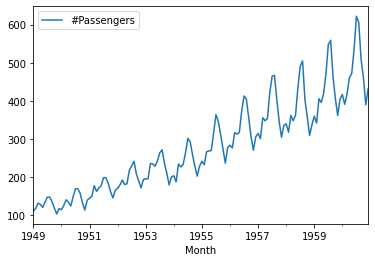

In [70]:
data.plot()
plt.show()
# data is not stationary
# it has trend
# it has seasonality

how do i know for sure if my data is stationary?
- ad-fuller test
- kpss test

In [71]:
#checking the stationarity of the data 

# the statistical properties of a 
#process generating a time series
# do not change over time 


#Thus, time series with trends, 
#or with seasonality, are not stationary 
#— the trend and seasonality will affect the value of the 
#time series at different times.


from statsmodels.tsa.stattools import adfuller
#p-value > 0.05: ---> not stationary
#p-value <= 0.05: --> stationary
result = adfuller(data['#Passengers'])
#print(result)
#print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#print('Critical Values:')
#for key, value in result[4].items():
	#print('\t%s: %.3f' % (key, value))
if result[1]>0.05:
	print('not stationary')
else:
	print("stationary")


p-value: 0.991880
not stationary


In [72]:
# adfuller --> p<0.05 ---> stationary
# kpss ------> p>0.05 ---> stationary

In [18]:
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical_values=kpss(data['#Passengers'])
if p>0.05:
  print('stattionary')
else:
  print("not stationary")
print(p)

not stationary
0.01


/Users/arpitagrawal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/arpitagrawal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).


 The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).

Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.



<AxesSubplot:title={'center':'Original Values'}, xlabel='Month'>

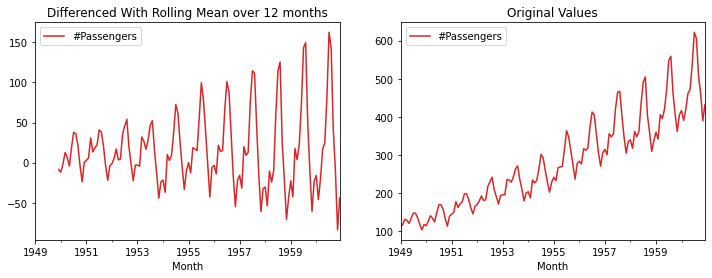

In [73]:
#Trend is a pattern in data that shows 
#the movement of a series to relatively
#higher or lower values over a long period of time

#removing trend using the rolling mean differencing 

rolling_mean = data.rolling(window=12).mean()

#Rolling means creating a rolling window with
# a specified size and perform calculations on
# the data in this window which, of course, rolls through the data.

#Rolling averages are useful for finding long-term trends otherwise
# disguised by occasional fluctuations. 
rolling_mean_detrended = data - rolling_mean

ax1 = plt.subplot(121)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red", 
                            title="Differenced With Rolling Mean over 12 months", 
                            ax=ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4), 
          color="tab:red", 
          title="Original Values", 
          ax=ax2)

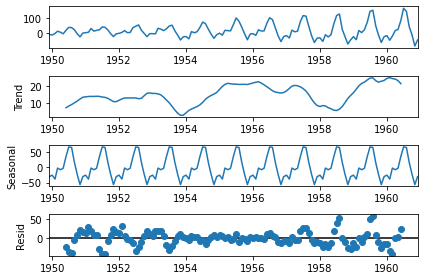

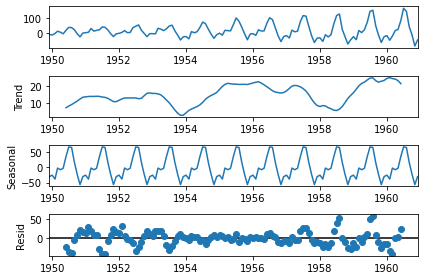

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(rolling_mean_detrended.dropna())
#We can check the trend and seasonality using the
# seasonal_decompose() method.
decompose_result.plot()


#Here in the  chart, we can see the decomposed
# structure of data and the structure of the components 
#in the data set which were affecting it.

In [22]:
rolling_mean_detrended.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [23]:
rolling_mean_detrended.shift(2).head(24)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [24]:
rolling_mean_detrended.head(24)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


<AxesSubplot:title={'center':'Differenced With Rolling Mean over 12 months'}, xlabel='Month'>

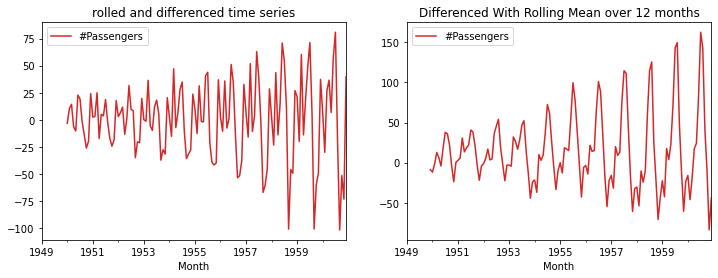

In [25]:
#removing seasonality from the time series
rolling_mean_detrended_diff = rolling_mean_detrended - rolling_mean_detrended.shift()

ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),
                                 color="tab:red", 
                                 title="rolled and differenced time series", 
                                 ax=ax1)
ax1 = plt.subplot(122)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red", 
                            title="Differenced With Rolling Mean over 12 months", 
                            ax=ax1)

<AxesSubplot:title={'center':'Original Values'}, xlabel='Month'>

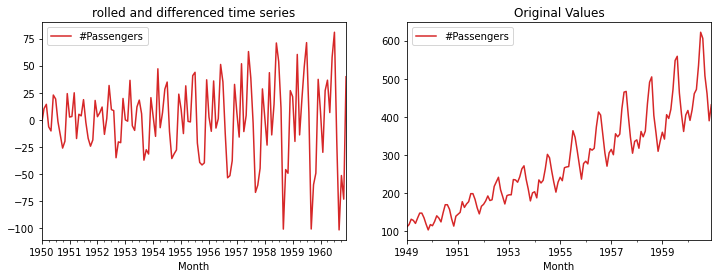

In [35]:
ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),
                                 color="tab:red", 
                                 title="rolled and differenced time series", 
                                 ax=ax1)
ax2 = plt.subplot(122)
data.plot(figsize=(12,4), 
          color="tab:red", 
          title="Original Values",
          ax=ax2)

In [36]:
rolling_mean_detrended.shift().head(13)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [37]:
rolling_mean_detrended_diff = rolling_mean_detrended_diff.dropna()

In [38]:
rolling_mean_detrended_diff

,#Passengers
Month,
1950-01-01,-3.250000
1950-02-01,10.333333
1950-03-01,14.250000
1950-04-01,-6.500000
1950-05-01,-10.333333
...,...
1960-08-01,-19.916667
1960-09-01,-101.750000
1960-10-01,-51.500000


In [39]:
result = adfuller(rolling_mean_detrended_diff['#Passengers'].dropna())
#print(result)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.154483
p-value: 0.022775
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


Running the example shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

Here the blue area is the confidence interval, and the candles started coming inside after the 13th candle. This can be due to the seasonality of 12-13 months.

In [40]:
dftest = adfuller(rolling_mean_detrended_diff['#Passengers'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val) 

1. ADF :  -3.154482634863554
2. P-Value :  0.022775264967860642
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


Here in differencing overpower transformed time series, we have got a good p-value near about 0.02 and lower than 0.05 in that we can consider over data is stationary. 

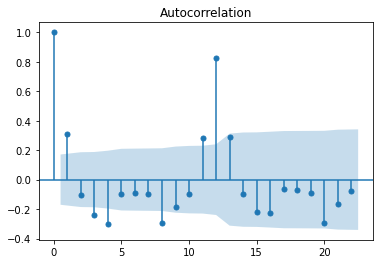

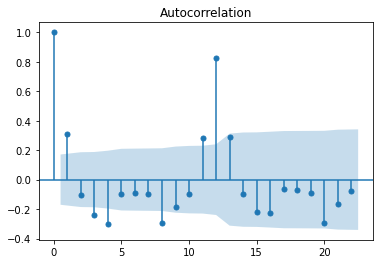

In [41]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
#To check for the stationarity of the time series,
# statsmodels provides a plot_acf method to plot an autocorrelation plot.
plot_acf(rolling_mean_detrended_diff['#Passengers'])


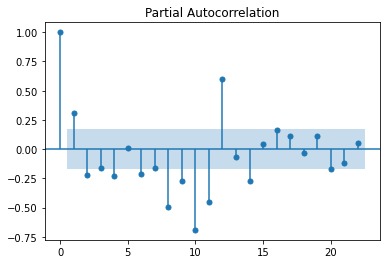

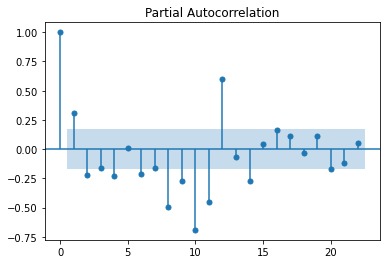

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(rolling_mean_detrended_diff['#Passengers'])

In [45]:
!pip install pmdarima
from pmdarima import auto_arima



  Using cached pmdarima-2.0.4-cp39-cp39-macosx_10_9_x86_64.whl (656 kB)
  Using cached numpy-2.0.1-cp39-cp39-macosx_10_9_x86_64.whl (21.2 MB)
  Using cached statsmodels-0.14.2-cp39-cp39-macosx_10_9_x86_64.whl (10.5 MB)
  Using cached numpy-1.26.4-cp39-cp39-macosx_10_9_x86_64.whl (20.6 MB)
  Using cached numpy-1.22.4.zip (11.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pandas-2.2.2-cp39-cp39-macosx_10_9_x86_64.whl (12.6 MB)
  Using cached scipy-1.13.1-cp39-cp39-macosx_10_9_x86_64.whl (39.4 MB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  ERROR: Command errored out with exit status 1:
   command: /opt/anaconda3/bin/python /opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py build_wheel /var/folders/8r/r02ft4g96gng27p7_46j1l9h0000gn/T/tmpoyaej4__
       cwd: /private/var/folders/8r/

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
order = auto_arima(rolling_mean_detrended_diff['#Passengers'], trace=True)
order.summary()

In [46]:
from statsmodels.tsa.arima_model import ARIMA

train = rolling_mean_detrended_diff.iloc[:120]['#Passengers']
test = rolling_mean_detrended_diff.iloc[121:]['#Passengers']
# ARIMA ---> AR + MA +I ---> ARIMA--> 3= AR , I=0 , MA=3
model = ARIMA(train, order=(3,0,3))
model_fit = model.fit() # training 
model_fit.summary()

/Users/arpitagrawal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/arpitagrawal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56754D+00    |proj g|=  5.45375D-02

At iterate    5    f=  4.55882D+00    |proj g|=  8.35865D-03

At iterate   10    f=  4.55540D+00    |proj g|=  9.73284D-03

At iterate   15    f=  4.55432D+00    |proj g|=  2.36735D-03

At iterate   20    f=  4.55057D+00    |proj g|=  6.77804D-03

At iterate   25    f=  4.54997D+00    |proj g|=  2.69456D-03

At iterate   30    f=  4.54992D+00    |proj g|=  6.67644D-04

At iterate   35    f=  4.54992D+00    |proj g|=  1.13332D-04

At iterate   40    f=  4.54992D+00    |proj g|=  2.42029D-04

At iterate   45    f=  4.54992D+00    |proj g|=  1.90070D-05

At iterate   50    f=  4.54992D+00    |proj g|=  6.30607D-06
  ys=-5.926E-11  -gs= 1.765E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                     ARMA(3, 3)   Log Likelihood                -545.991
Method:                       css-mle   S.D. of innovations             22.043
Date:                Wed, 07 Aug 2024   AIC                           1107.981
Time:                        11:30:29   BIC                           1130.281
Sample:                    01-01-1950   HQIC                          1117.037
                         - 12-01-1959                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0650      0.039      1.667      0.095      -0.011       0.141
ar.L1.#Passengers     0.8468      0.099      8.564      0.000       0.653       1.041
ar.L2.#Passengers     0.2433      0.136      1.788      0.074      -0.023       0.510
ar.L3.#Passengers    -0.5315      0.093     -5.734      0.000      -0.713      -0.350
ma.L1.#Passengers    -0.9178      0.088    -10.459      0.000      -1.090      -0.746
ma.L2.#Passengers    -0.9176      0.074    -12.451      0.000      -1.062      -0.773
ma.L3.#Passengers     0.8354      0.078     10.777      0.000       0.683       0.987
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4792           -0.0000j            1.4792           -0.5000
AR.2            0.9685           -0.5779j            1.1278           -0.0856
AR.3            0.9685           +0.5779j            1.1278            0.0856
MA.1           -1.0460           +0.0000j            1.0460            0.5000
MA.2            1.0002           +0.0000j            1.0002            0.0000
MA.3            1.1441           +0.0000j            1.1441            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

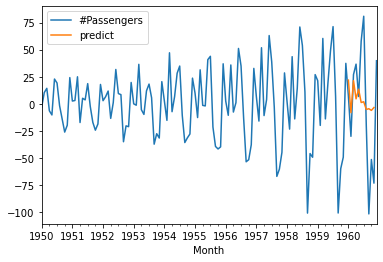

In [47]:
rolling_mean_detrended_diff['predict'] = model_fit.predict(start= len(train), 
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)
rolling_mean_detrended_diff[['#Passengers','predict']].plot()

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(3,0,3), seasonal_order=(3,0,3,12))
model = model.fit()

/Users/arpitagrawal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitagrawal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitagrawal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/arpitagrawal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93212D+00    |proj g|=  1.18181D+00

At iterate    5    f=  4.36339D+00    |proj g|=  2.97781D-02

At iterate   10    f=  4.24311D+00    |proj g|=  8.57652D-02
  ys=-3.887E+06  -gs= 1.946E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


LinAlgError: LU decomposition error.

In [ ]:
rolling_mean_detrended_diff['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1, 
                                                       dynamic=True)
rolling_mean_detrended_diff[['#Passengers','predict']].plot()

In [51]:
#predicting the projections for the next 5 years

forecast = model.forecast(steps=60)
rolling_mean_detrended_diff.plot()
forecast.plot()

AttributeError: 'SARIMAX' object has no attribute 'forecast'

In [50]:
type(forecast)

NameError: name 'forecast' is not defined